<a href="https://colab.research.google.com/github/Brudeoli17/Projeto-LogInova-Consultoria/blob/main/Cluster_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import folium
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

data = pd.read_excel('/content/drive/MyDrive/Planilhas/Clientes.xlsx')


In [ ]:
display(data)


,CO.Cliente,MUN,LAT,LONG
0,2301,VALINHOS,-22.951880,-47.027790
1,2302,CAMPINAS,-22.894290,-47.058220
2,2303,CAMPINAS,-22.926340,-47.039740
3,2304,CAMPINAS,-22.833090,-47.079430
4,2305,CAMPINAS,-22.823070,-47.078180
5,2306,VALINHOS,-22.975090,-47.014780
6,2307,CAMPINAS,-22.949560,-47.092680
7,2308,CAMPINAS,-22.880620,-46.969440
8,2309,AMERICANA,-22.722370,-47.307400
9,2310,SAO PAULO,-23.470840,-46.649650


In [ ]:

x = data ['LAT']
y = data ['LONG']


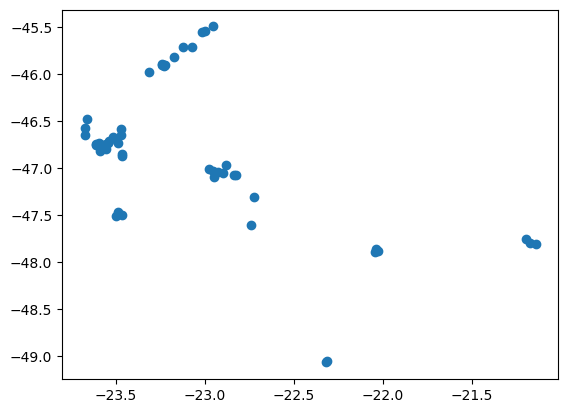

In [ ]:
plt.scatter(x, y)

In [ ]:
features = data[['LAT','LONG']]

In [ ]:
kmeans = KMeans(n_clusters=7, init='k-means++', n_init=1, random_state=42)


In [ ]:
kmeans.fit(features)

KMeans(n_clusters=7, n_init=1, random_state=42)

In [ ]:
data['Cluster'] = kmeans.labels_ + 1

In [ ]:
print(data)


    CO.Cliente                    MUN        LAT       LONG  Cluster
0         2301               VALINHOS -22.951880 -47.027790        6
1         2302               CAMPINAS -22.894290 -47.058220        6
2         2303               CAMPINAS -22.926340 -47.039740        6
3         2304               CAMPINAS -22.833090 -47.079430        6
4         2305               CAMPINAS -22.823070 -47.078180        6
5         2306               VALINHOS -22.975090 -47.014780        6
6         2307               CAMPINAS -22.949560 -47.092680        6
7         2308               CAMPINAS -22.880620 -46.969440        6
8         2309              AMERICANA -22.722370 -47.307400        2
9         2310              SAO PAULO -23.470840 -46.649650        3
10        2311             PIRACICABA -22.741450 -47.601810        2
11        2312                JACAREI -23.311050 -45.981070        1
12        2313    SAO JOSE DOS CAMPOS -23.222990 -45.905950        1
13        2314    SAO JOSE DOS CAM

In [ ]:
# Salvar DataFrame em um arquivo CSV
data.to_csv('Clientes_Cluster.csv', index=False)


In [ ]:

centroids = kmeans.cluster_centers_

In [ ]:
labels = kmeans.labels_

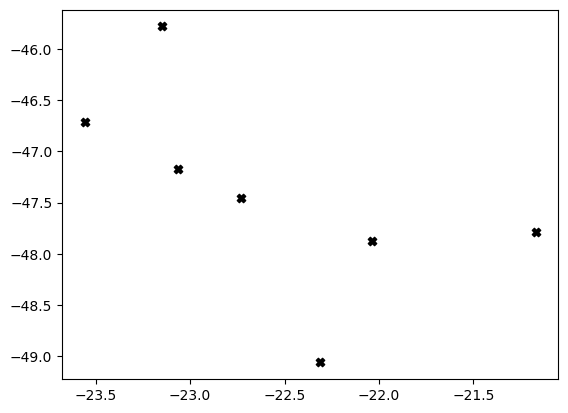

In [ ]:
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='black')

In [ ]:
latitudes = centroids[:, 0]
longitudes = centroids[:, 1]
cluster_ids = np.unique(labels)

# Imprimir latitudes, longitudes e rótulos dos centroides
for i, centroid in enumerate(centroids):
    latitude = latitudes[i]
    longitude = longitudes[i]
    cluster_id = cluster_ids[i]
    print(f"Centroide {i+1}: Latitude: {latitude}, Longitude: {longitude}, Cluster ID: {cluster_id}")

print(centroids)

Centroide 1: Latitude: -23.1504295525, Longitude: -45.77803517416667, Cluster ID: 0
Centroide 2: Latitude: -22.73191, Longitude: -47.454605, Cluster ID: 1
Centroide 3: Latitude: -23.558515555555555, Longitude: -46.713095, Cluster ID: 2
Centroide 4: Latitude: -21.17044, Longitude: -47.785086666666665, Cluster ID: 3
Centroide 5: Latitude: -22.31419, Longitude: -49.062805, Cluster ID: 4
Centroide 6: Latitude: -23.061993636363635, Longitude: -47.16717, Cluster ID: 5
Centroide 7: Latitude: -22.035606666666666, Longitude: -47.87679, Cluster ID: 6
[[-23.15042955 -45.77803517]
 [-22.73191    -47.454605  ]
 [-23.55851556 -46.713095  ]
 [-21.17044    -47.78508667]
 [-22.31419    -49.062805  ]
 [-23.06199364 -47.16717   ]
 [-22.03560667 -47.87679   ]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Planilhas/Rotas.csv')

In [ ]:
Cluster = pd.read_csv('/content/drive/MyDrive/Planilhas/Clientes_Cluster.csv', low_memory=False, sep=';', encoding='UTF-8')

In [ ]:
Cluster.head(5)

,CO.Cliente,MUN,LAT,LONG,Cluster
0,2301,VALINHOS,"-22,95188","-47,02779",6
1,2302,CAMPINAS,"-22,89429","-47,05822",6
2,2303,CAMPINAS,"-22,92634","-47,03974",6
3,2304,CAMPINAS,"-22,83309","-47,07943",6
4,2305,CAMPINAS,"-22,82307","-47,07818",6


In [ ]:
import pandas as pd

# Realizar a junção dos DataFrames
result = pd.merge(Cluster, data, how='outer', on='CO.Cliente')

In [ ]:
result.head(5)

,CO.Cliente,MUN,LAT,LONG,Cluster,Dt.Fatura,Dt.Entrega,Mes.Base,Ano.Exec,CO.Fabrica,Tp.Operacao,Incoterm,Veiculo,Qtd.Transp,Moeda,Vlr.Frete
0,2301,VALINHOS,"-22,95188","-47,02779",6,11/01/2021,15/01/2021,Jan,2021,3424402,VD,FOB,P12,1600,BRL,0.0
1,2301,VALINHOS,"-22,95188","-47,02779",6,10/01/2021,15/01/2021,Jan,2021,3403208,VD,FOB,P12,1600,BRL,0.0
2,2301,VALINHOS,"-22,95188","-47,02779",6,14/01/2021,16/01/2021,Jan,2021,3424402,VD,FOB,P12,1600,BRL,0.0
3,2301,VALINHOS,"-22,95188","-47,02779",6,02/01/2021,07/01/2021,Jan,2021,3424402,VD,FOB,P12,1600,BRL,0.0
4,2301,VALINHOS,"-22,95188","-47,02779",6,05/01/2021,10/01/2021,Jan,2021,3403208,VD,FOB,P12,1800,BRL,0.0


In [ ]:
result.to_excel('Rotas_Cluster.xlsx', index=False)

In [ ]:
agrupado = result.groupby(['Cluster'])['Qtd.Transp'].sum().reset_index()[['Cluster', 'Qtd.Transp']]
print(agrupado)

   Cluster  Qtd.Transp
0        1    17258200
1        2     5341000
2        3    38613600
3        4     4948400
4        5     3500000
5        6    18557600
6        7     2272000


In [ ]:
import pandas as pd

# Realizar a operação de agrupamento e soma, mantendo apenas as colunas desejadas
agrupado = result.groupby(['Cluster'])['Qtd.Transp'].sum().reset_index()[['Cluster', 'Qtd.Transp']]

# Exibir o DataFrame resultante
print(agrupado)


   Cluster  Qtd.Transp
0        1    17258200
1        2     5341000
2        3    38613600
3        4     4948400
4        5     3500000
5        6    18557600
6        7     2272000
